# Exercises in Classification I

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

## Exercise 1

In this exercise, we continue from Exercise 1 and 2 from Multiple Linear Regression and look at the [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency) dataset (The file "EnergyEfficiency.csv" is also on Moodle). 

Answer the following questions:
1. Do a train-test split of the data and retrain the simple linear regression model between `SurfaceArea` and `HeatingLoad`.
2. Calculate R-square, MAE, and RMSE on the training set
3. Calculate R-square, MAE, and RMSE on the test set
4. Does the model overfit?
5. Visualize the model (the straight line) trained on the training set in a scatter plot of the test dataset. Try also to add the line to a Seaborn regplot of the test dataset.

### 1. Do a train-test split of the data and retrain the simple linear regression model between SurfaceArea and HeatingLoad.

In [9]:
df = pd.read_csv("../Notebooks and data-7/EnergyEfficiency.csv")
df

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RelativeCompactness      768 non-null    float64
 1   SurfaceArea              768 non-null    float64
 2   WallArea                 768 non-null    float64
 3   RoofArea                 768 non-null    float64
 4   OverallHeight            768 non-null    float64
 5   Orientation              768 non-null    int64  
 6   GlazingArea              768 non-null    float64
 7   GlazingAreaDistribution  768 non-null    int64  
 8   HeatingLoad              768 non-null    float64
 9   CoolingLoad              768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [11]:
X_df = df[["SurfaceArea"]]
X_df.head()

,SurfaceArea
0,514.5
1,514.5
2,514.5
3,514.5
4,563.5


In [12]:
y = df[["HeatingLoad"]] ## double [] returns dataFrame
y.head()

,HeatingLoad
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=123)

In [14]:
X_train.head()

,SurfaceArea
429,808.5
524,808.5
212,661.5
558,710.5
66,637.0


In [15]:
y_train.head()

,HeatingLoad
429,14.34
524,13.68
212,33.08
558,14.50
66,36.90


In [16]:
X_test.head()

,SurfaceArea
236,808.5
395,588.0
36,759.5
210,637.0
483,514.5


In [17]:
y_test.head()

,HeatingLoad
236,12.85
395,29.07
36,7.18
210,35.45
483,28.61


In [18]:
mlr_model = linear_model.LinearRegression()

In [19]:
mlr_model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_train = mlr_model.predict(X_train)

In [21]:
y_pred_test = mlr_model.predict(X_test)

### 2. Calculate R-square, MAE, and RMSE on the training set

### 3. Calculate R-square, MAE, and RMSE on the test set

In [24]:
def train_test_score(y_train, y_pred_train, y_test, y_pred_test):
    print("Train data")
    print("r2:   ", r2_score(y_train, y_pred_train))
    print("MAE:  ", mean_absolute_error(y_train, y_pred_train))
    print("RMSE: ", root_mean_squared_error(y_train, y_pred_train))
    print("")
    print("Test data")
    print("r2:   ", r2_score(y_test, y_pred_test))
    print("MAE:  ", mean_absolute_error(y_test, y_pred_test))
    print("RMSE: ", root_mean_squared_error(y_test, y_pred_test))

In [25]:
train_test_score(y_train, y_pred_train, y_test, y_pred_test)

Train data
r2:    0.4332160396042245
MAE:   6.041301923326048
RMSE:  7.656966645013405

Test data
r2:    0.41557823932557225
MAE:   6.000573316838089
RMSE:  7.463018616736097


### 4. Does the model overfit?

    The test data is more acurate than the training data, but it is not by much and is within margins of error and noise
    The training fits well, does not under fit or over fit

### 5. Visualize the model (the straight line) trained on the training set in a scatter plot of the test dataset. Try also to add the line to a Seaborn regplot of the test dataset

<Axes: xlabel='SurfaceArea', ylabel='HeatingLoad'>

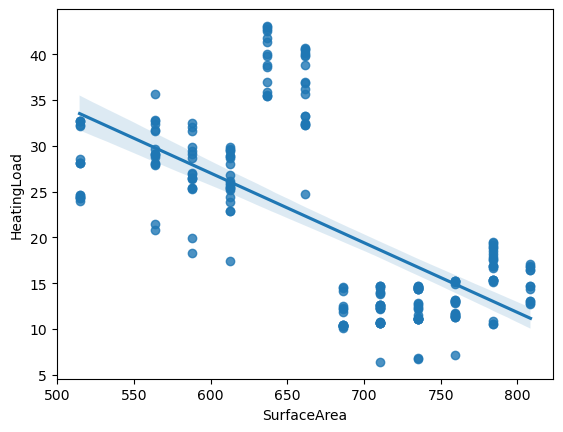

In [29]:
sns.regplot(x=X_test, y=y_test)

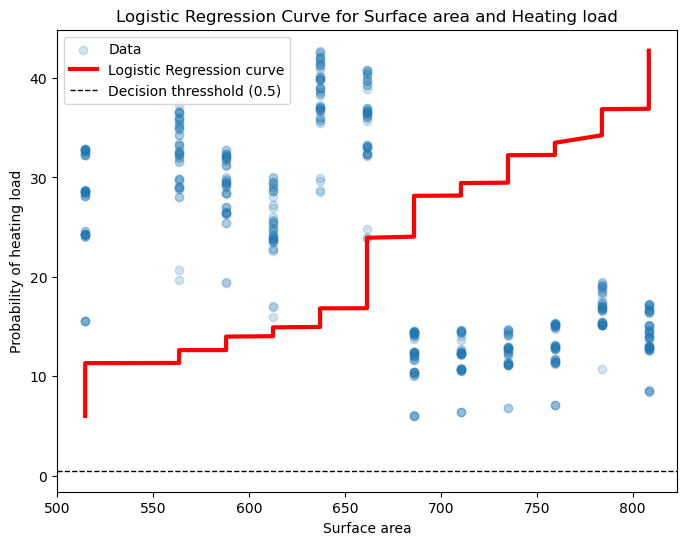

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train["SurfaceArea"], y_train, alpha=0.2, label='Data')
plt.plot(X_train["SurfaceArea"].sort_values(), y_train["HeatingLoad"].sort_values(), color='red', linewidth=3, label='Logistic Regression curve')
plt.axhline(y=0.5, color='black', linestyle="dashed", linewidth = 1, label = "Decision thresshold (0.5)")
plt.xlabel('Surface area')
plt.ylabel('Probability of heating load')
plt.title('Logistic Regression Curve for Surface area and Heating load')
plt.legend()
plt.show()

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

### 1. Clean the income variable such that it has only two values

In [33]:
df_adult = pd.read_csv("../Notebooks and data-7/adult.csv")

In [34]:
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [35]:
df_adult = df_adult.replace({"<=50K.": "<=50K", ">50K.": ">50K"})

In [36]:
df_adult["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [37]:
df_adult["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

### 2. Select as set of minimum two feature variables you want to use to predict income. Do the necessary transformation of these variables.

In [39]:
print(df_adult.isna().sum())

df_adult = df_adult.dropna()

print(df_adult.isna().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [40]:
df_adult2 = pd.get_dummies(df_adult["workclass"], drop_first=True, dtype=int)
df_adult2 = df_adult2.join(pd.get_dummies(df_adult["education"], drop_first=True, dtype=int))

In [41]:
df_adult2["income"] = df_adult["income"]
df_adult2

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,...,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,income
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,<=50K
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,<=50K
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,<=50K
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,<=50K
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,<=50K
48837,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,<=50K
48839,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,<=50K
48840,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,<=50K


### 3. Create X and y dataset and split the datasets into training and testing sets

In [43]:
df_adult2.columns

Index(['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th', '12th',
       '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc',
       'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool',
       'Prof-school', 'Some-college', 'income'],
      dtype='object')

In [44]:
X_adult_df = df_adult2[['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th', '12th',
       '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc',
       'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool',
       'Prof-school', 'Some-college']]
X_adult_df

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,...,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48837,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48839,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48840,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
adult_y = df_adult2["income"]
adult_y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48836    <=50K
48837    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 47621, dtype: object

In [46]:
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(X_adult_df, adult_y, test_size=0.3, random_state=42)

### 4. Train a KNN classifier to predict the variable income based on the feature variables selected in 2 - try out some different K

In [48]:
def knnSweep(X, y, maxK):
    # We create a 2-D array to store all accuracy values
    accuracy_row_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        
    for k in range(2, maxK + 1):
        # Model intializing
        knn = KNeighborsClassifier(n_neighbors=k)

        # Training (very light compared to an eager learner)
        knn.fit(X_train, y_train)

        # Predicting on train and test set
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)

        print("KNN with k={}:".format(k) + " completed")
            
        # Get the accuracy from metrics
        accuracy_train = accuracy_score(y_train, y_pred_train)
        #print("Training accuracy: {}".format(accuracy_train))
        accuracy_test = accuracy_score(y_test, y_pred_test)
        #print("Test accuracy: {}\r\n".format(accuracy_test))

        accuracy_row_list.append({"k": k, "Training accuracy": accuracy_train, "Test accuracy": accuracy_test})

    return pd.DataFrame(accuracy_row_list)

In [49]:
def knnSweep_parallel(X, y, k):
    # We create a 2-D array to store all accuracy values
    accuracy_row_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        
    # Model intializing
    knn = KNeighborsClassifier(n_neighbors=k)

    # Training (very light compared to an eager learner)
    knn.fit(X_train, y_train)

    # Predicting on train and test set
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    print("KNN with k={}:".format(k) + " completed")
        
    # Get the accuracy from metrics
    accuracy_train = accuracy_score(y_train, y_pred_train)
    #print("Training accuracy: {}".format(accuracy_train))
    accuracy_test = accuracy_score(y_test, y_pred_test)
    #print("Test accuracy: {}\r\n".format(accuracy_test))

    accuracy_row_list.append({"k": k, "Training accuracy": accuracy_train, "Test accuracy": accuracy_test})

    return pd.DataFrame(accuracy_row_list)

In [3]:
from joblib import Parallel, delayed
from timeit import default_timer as timer

    k=40
    
    jobs 10: 6 min 6 sec

    jobs 5:  6 min 43 sec

    jobs 1:  14 min 27 sec

In [84]:
start = timer() # DO NOt, use more than 10 jobs, you run out of ram! laptop, don't even try any more than 5
  
acc_df = Parallel(n_jobs=5)(delayed(knnSweep_parallel)(X_adult_df, adult_y, i +1) for i in range(40))

end = timer()
print(end - start)

acc_df 

356.9856927000001


[   k  Training accuracy  Test accuracy
 0  1           0.566457       0.560642,
    k  Training accuracy  Test accuracy
 0  2           0.754557       0.748866,
    k  Training accuracy  Test accuracy
 0  3           0.747781        0.74601,
    k  Training accuracy  Test accuracy
 0  4           0.774353       0.767512,
    k  Training accuracy  Test accuracy
 0  5           0.770265       0.759029,
    k  Training accuracy  Test accuracy
 0  6           0.769369       0.764908,
    k  Training accuracy  Test accuracy
 0  7           0.769985       0.761213,
    k  Training accuracy  Test accuracy
 0  8           0.773065       0.766588,
    k  Training accuracy  Test accuracy
 0  9           0.775892       0.767848,
     k  Training accuracy  Test accuracy
 0  10           0.775892       0.767848,
     k  Training accuracy  Test accuracy
 0  11           0.776368        0.76726,
     k  Training accuracy  Test accuracy
 0  12           0.776004        0.76852,
     k  Training accur

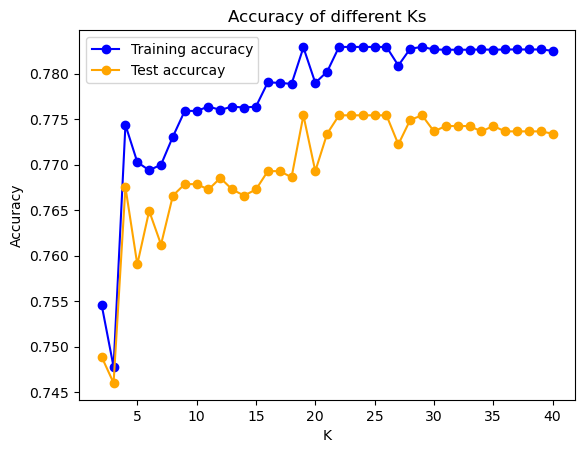

In [75]:
plt.plot(acc_df["k"], acc_df["Training accuracy"], label = 'Training accuracy', color='blue', marker='o', linestyle='solid')
plt.plot(acc_df["k"], acc_df["Test accuracy"], label = 'Test accurcay', color='orange', marker='o', linestyle='solid')
    
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Ks")
plt.legend()

plt.show()

In [73]:
acc_df = knnSweep(X_adult_df, adult_y, 40) # try 40: 18 seems to be max benefit, anything above 23 and it gets worse
acc_df

KNN with k=2: completed
KNN with k=3: completed
KNN with k=4: completed
KNN with k=5: completed
KNN with k=6: completed
KNN with k=7: completed
KNN with k=8: completed
KNN with k=9: completed
KNN with k=10: completed
KNN with k=11: completed
KNN with k=12: completed
KNN with k=13: completed
KNN with k=14: completed
KNN with k=15: completed
KNN with k=16: completed
KNN with k=17: completed
KNN with k=18: completed
KNN with k=19: completed
KNN with k=20: completed
KNN with k=21: completed
KNN with k=22: completed
KNN with k=23: completed
KNN with k=24: completed
KNN with k=25: completed
KNN with k=26: completed
KNN with k=27: completed
KNN with k=28: completed
KNN with k=29: completed
KNN with k=30: completed
KNN with k=31: completed
KNN with k=32: completed
KNN with k=33: completed
KNN with k=34: completed
KNN with k=35: completed
KNN with k=36: completed
KNN with k=37: completed
KNN with k=38: completed
KNN with k=39: completed
KNN with k=40: completed


,k,Training accuracy,Test accuracy
0,2,0.754557,0.748866
1,3,0.747781,0.746010
2,4,0.774353,0.767512
3,5,0.770265,0.759029
4,6,0.769369,0.764908
5,7,0.769985,0.761213
6,8,0.773065,0.766588
7,9,0.775892,0.767848
8,10,0.775892,0.767848
9,11,0.776368,0.767260


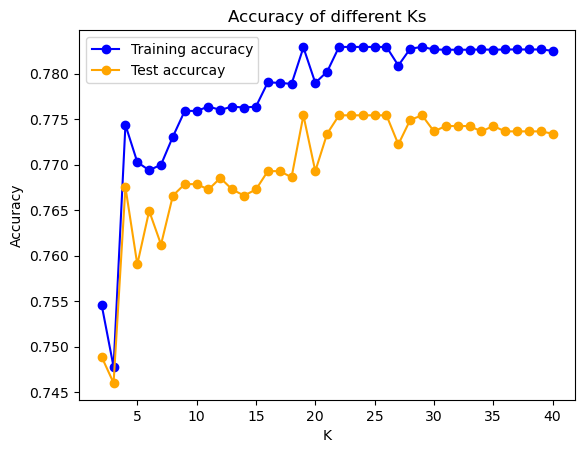

In [75]:
plt.plot(acc_df["k"], acc_df["Training accuracy"], label = 'Training accuracy', color='blue', marker='o', linestyle='solid')
plt.plot(acc_df["k"], acc_df["Test accuracy"], label = 'Test accurcay', color='orange', marker='o', linestyle='solid')
    
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Ks")
plt.legend()

plt.show()

### 5. Train a logistic regression classifier to predict the variable income based on the feature variables selected in 2 and compare it to the KNN classifier.

In [56]:
logit_model_sk = linear_model.LogisticRegression()

In [57]:
logit_model_sk.fit(X_adult_train, y_adult_train)

LogisticRegression()

In [58]:
y_pred_train = logit_model_sk.predict(X_adult_train)
y_pred_test = logit_model_sk.predict(X_adult_test)

In [59]:
y_pred_test

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [60]:
accuracy_score(y_adult_train, y_adult_pred_train)

NameError: name 'y_adult_pred_train' is not defined

In [ ]:
accuracy_score(y_adult_test, y_adult_pred_test)

In [ ]:
y_pred_train_prop = logit_model_sk.predict_proba(X_adult_train)
y_pred_train_prop

In [ ]:
y_pred_train_prop2 = y_pred_train_prop[: , 0]

In [ ]:
y_pred_train_prop2.sort()

In [ ]:
y_pred_train_prop2 = pd.Series(y_pred_train_prop2)
y_pred_train_prop2

In [ ]:
X_adult_df

In [ ]:
for i in X_adult_df.columns:
    create_figure(i)

In [ ]:
y_pred_train_prop2

In [ ]:
def create_figure(feature):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_adult_train[feature], y_pred_train_prop2, alpha=0.2, label='Data')
    plt.plot(X_adult_train[feature].sort_values(), y_pred_train_prop2, color='red', linewidth=3, label='Logistic Regression curve')
    plt.axhline(y=0.5, color='black', linestyle="dashed", linewidth = 1, label = "Decision thresshold (0.5)")
    plt.xlabel(feature)
    plt.ylabel('Probability of income')
    plt.title('Logistic Regression Curve for income and ')
    plt.legend()
    plt.show()

### 6. Train a decision tree classifier to predict the variable income based on the feature variables selected in 2 and compare it to the previous classifiers.

In [ ]:
X_adult_df

In [ ]:
X_adult_train

In [ ]:
y_pred_train_prop2